# BaggingClassifier ALGORITHM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('airline.CSV')
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['id'])
df = df.drop(columns=['Arrival_Delay_in_Minutes'])
df = df.drop(columns=['Flight_Distance'])
df = df.drop(columns=['Departure/Arrival time convenient'])
df = df.drop(columns=['Ease of Online booking'])
df = df.drop(columns=['Gate location'])

In [3]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,5,3,4,3,5,5,5,5,2,5,5,50,satisfied
1,Female,Loyal Customer,36,Business travel,Business,1,5,4,5,4,4,4,4,3,4,5,0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,2,2,2,2,2,4,1,3,2,2,2,0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,0,3,4,4,1,1,1,1,3,1,4,0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,2,4,1,2,2,2,2,2,4,2,4,0,satisfied


In [4]:
df.tail()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Inflight_wifi_service,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
25971,Male,disloyal Customer,34,Business travel,Business,3,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,4,4,4,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,2,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,3,4,4,4,4,3,2,5,4,5,4,0,satisfied
25975,Female,Loyal Customer,42,Personal Travel,Eco,2,4,2,2,1,1,2,1,1,1,1,0,neutral or dissatisfied


In [5]:
print(df.isnull().sum())

Gender                        0
Customer_Type                 0
Age                           0
Type_of_Travel                0
Class                         0
Inflight_wifi_service         0
Food_and_drink                0
Online_boarding               0
Seat_comfort                  0
Inflight_entertainment        0
Onboard_service               0
Leg_room_service              0
Baggage_handling              0
Checkin_service               0
Inflight_service              0
Cleanliness                   0
Departure_Delay_in_Minutes    0
satisfaction                  0
dtype: int64


In [6]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Inflight_wifi_service', 'Food_and_drink', 'Online_boarding',
       'Seat_comfort', 'Inflight_entertainment', 'Onboard_service',
       'Leg_room_service', 'Baggage_handling', 'Checkin_service',
       'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      25976 non-null  object
 1   Customer_Type               25976 non-null  object
 2   Age                         25976 non-null  int64 
 3   Type_of_Travel              25976 non-null  object
 4   Class                       25976 non-null  object
 5   Inflight_wifi_service       25976 non-null  int64 
 6   Food_and_drink              25976 non-null  int64 
 7   Online_boarding             25976 non-null  int64 
 8   Seat_comfort                25976 non-null  int64 
 9   Inflight_entertainment      25976 non-null  int64 
 10  Onboard_service             25976 non-null  int64 
 11  Leg_room_service            25976 non-null  int64 
 12  Baggage_handling            25976 non-null  int64 
 13  Checkin_service             25976 non-null  in

In [9]:
# Check the unique columns of our specific column
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
# Check the unique columns of our specific column
df['Customer_Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [11]:
# Check the unique columns of our specific column
df['Type_of_Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [12]:
# Check the unique columns of our specific column
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [13]:
# Check the unique columns of our specific column
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Gender','Customer_Type','Type_of_Travel','Class','satisfaction']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [15]:
# Check the unique columns of our specific column
df['Gender'].unique()

array([0, 1])

In [16]:
# Check the unique columns of our specific column
df['Customer_Type'].unique()

array([0, 1])

In [17]:
# Check the unique columns of our specific column
df['Type_of_Travel'].unique()

array([0, 1])

In [18]:
# Check the unique columns of our specific column
df['Class'].unique()

array([1, 0, 2])

In [19]:
# Check the unique columns of our specific column
df['satisfaction'].unique()

array([1, 0])

In [20]:
x1 = df.drop(labels='satisfaction', axis=1)
y1 = df.loc[:,'satisfaction']

In [21]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 14573, 1: 11403})
OVER SAMPLING DATA COUNT  :  Counter({1: 14573, 0: 14573})


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  23316
NUMBER OF TEST DATASET      :  5830
TOTAL NUMBER OF DATASET    :  29146


In [23]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  23316
NUMBER OF TEST DATASET      :  5830
TOTAL NUMBER OF DATASET    :  29146


In [24]:
from sklearn.ensemble import BaggingClassifier

In [25]:
BC = BaggingClassifier(n_estimators=10, random_state=42)
BC.fit(x_train,y_train)

BaggingClassifier(random_state=42)

In [26]:
predicted = BC.predict(x_test)

In [27]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF BaggingClassifier:\n\n',cr)

THE CLASSIFICATION REPORT OF BaggingClassifier:

               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2915
           1       0.96      0.96      0.96      2915

    accuracy                           0.96      5830
   macro avg       0.96      0.96      0.96      5830
weighted avg       0.96      0.96      0.96      5830



In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF BaggingClassifier:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF BaggingClassifier:


 [[2804  111]
 [ 109 2806]]


In [29]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(BC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [95.21440823 95.50523246 95.41945445 95.64247727 98.14719506]


In [30]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF BaggingClassifier is :",a*100)

THE ACCURACY SCORE OF BaggingClassifier is : 96.22641509433963


In [31]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF BaggingClassifier is :",hl*100)

THE HAMMING LOSS OF BaggingClassifier is : 3.7735849056603774


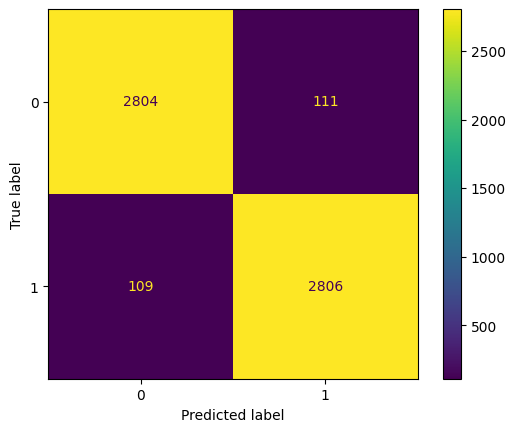

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=BC.classes_)
CMD.plot()
plt.show()

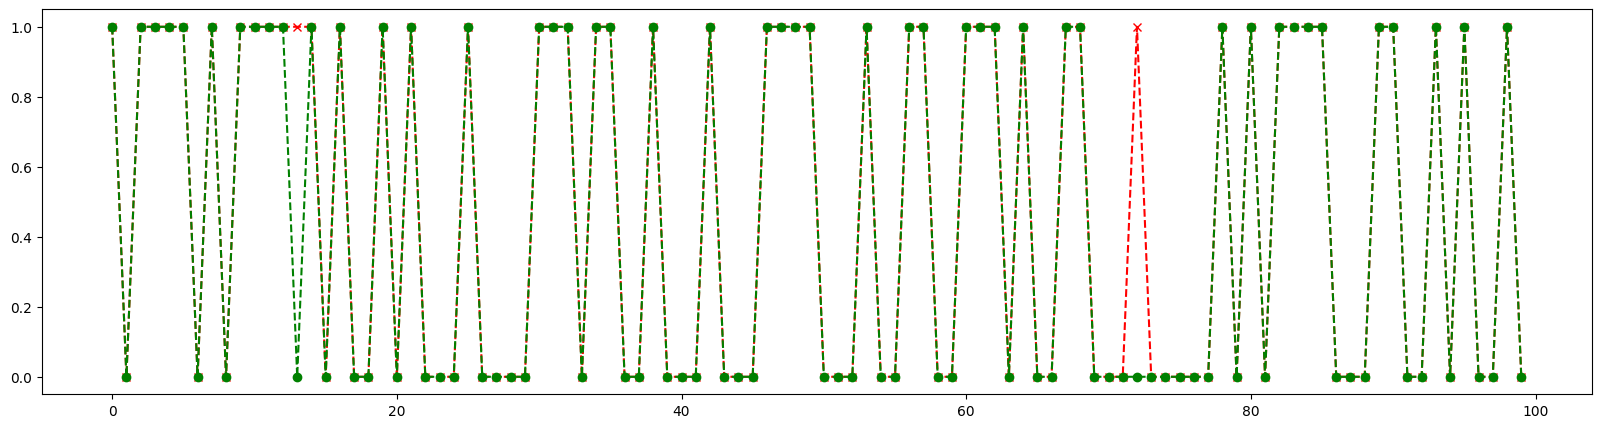

In [33]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()

In [34]:
import joblib
joblib.dump(BC, 'AIRLINE4.pkl')

['AIRLINE4.pkl']